In [1]:
!pip install scikit-learn numpy spacy sentence-transformers fuzzywuzzy python-levenshtein matplotlib seaborn
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 43.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 36.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [sentence-transformers]ence-transformers]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.6 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss
from sentence_transformers import SentenceTransformer, util
from fuzzywuzzy import fuzz


In [4]:
model = SentenceTransformer("all-MiniLM-L6-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
import json
import os

file_path = "/Users/tsreeyarao/Downloads/ground_truth.json"
if os.path.exists(file_path):
    with open(file_path, "r") as f:
        truth = json.load(f)
    truth[:1] 
else:
    print(f"File '{file_path}' not found. Please check the file path or create the file.")  # Added missing closing parenthesis here

In [10]:
def text_similarity(pred, true):
    if not pred or not true:
        return 0.0
    emb1 = model.encode(pred, convert_to_tensor=True)
    emb2 = model.encode(true, convert_to_tensor=True)
    return float(util.cos_sim(emb1, emb2)[0][0])


def exact_match(pred, true):
    return 1 if pred and true and pred.lower() == true.lower() else 0


def list_similarity(pred_list, true_list):
    pred_set = set([p.lower() for p in pred_list])
    true_set = set([t.lower() for t in true_list])
    if not pred_set and not true_set:
        return 1
    return len(pred_set & true_set) / len(pred_set | true_set)


In [11]:
name_acc = []
email_acc = []
phone_acc = []

skill_precisions = []
skill_recalls = []
skill_f1s = []
skill_jaccards = []
skill_hamming = []

edu_similarities = []
exp_similarities = []

field_accuracy = []
resume_accuracy = []


In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss


def exact_match(pred, true):
    return 1 if pred == true else 0

def list_similarity(pred, true):
    pred_set = set([s.lower() for s in pred])
    true_set = set([s.lower() for s in true])
    if not pred_set and not true_set:
        return 1.0
    return len(pred_set.intersection(true_set)) / len(pred_set.union(true_set))

def text_similarity(pred, true):
    
    if not pred and not true:
        return 1.0
    
    return 0.5  

def parse_resume(file_path):
    return {
        "Name": "John Doe",
        "Email": "john@example.com",
        "Phone": "123-456-7890",
        "Skills": ["Python", "Data Analysis"],
        "Education": ["Bachelor's Degree"],
        "Experience": ["Software Developer"]
    }

# metrics
name_acc = []
email_acc = []
phone_acc = []
skill_precisions = []
skill_recalls = []
skill_f1s = []
skill_hamming = []
skill_jaccards = []
edu_similarities = []
exp_similarities = []
field_accuracy = []
resume_accuracy = []

# error handling 
for item in truth:
    try:
        parsed = parse_resume(item["file"])
        
        if parsed is None:
            print(f"Warning: Failed to parse resume for {item.get('file', 'unknown file')}")
            continue
            
        # Name
        if "Name" in parsed and "Name" in item:
            name_acc.append(exact_match(parsed["Name"], item["Name"]))
        
        # Email
        if "Email" in parsed and "Email" in item:
            email_acc.append(exact_match(parsed["Email"], item["Email"]))
        
        # Phone
        if "Phone" in parsed and "Phone" in item:
            phone_acc.append(exact_match(parsed["Phone"], item["Phone"]))
        
        # Skills 
        if "Skills" in parsed and "Skills" in item:
            true_skills = item["Skills"]
            pred_skills = parsed["Skills"]
            
            if not isinstance(true_skills, list):
                true_skills = []
            if not isinstance(pred_skills, list):
                pred_skills = []
            
            all_skills = sorted(list(set([s.lower() for s in true_skills + pred_skills])))
            
            if all_skills:  
                true_bin = [1 if s in [x.lower() for x in true_skills] else 0 for s in all_skills]
                pred_bin = [1 if s in [x.lower() for x in pred_skills] else 0 for s in all_skills]
                
                skill_precisions.append(precision_score(true_bin, pred_bin, zero_division=0))
                skill_recalls.append(recall_score(true_bin, pred_bin, zero_division=0))
                skill_f1s.append(f1_score(true_bin, pred_bin, zero_division=0))
                skill_hamming.append(hamming_loss(true_bin, pred_bin))
                skill_jaccards.append(list_similarity(pred_skills, true_skills))
        
        # Education Semantic Similarity 
        if "Education" in parsed and "Education" in item:
            edu_similarities.append(
                text_similarity(" ".join(parsed["Education"]), " ".join(item["Education"]))
            )
        
        # Experience Semantic Similarity 
        if "Experience" in parsed and "Experience" in item:
            exp_similarities.append(
                text_similarity(" ".join(parsed["Experience"]), " ".join(item["Experience"]))
            )
        
        # Field Accuracy 
        fields = ["Name", "Email", "Phone"]
        available_fields = [f for f in fields if f in parsed and f in item]
        if available_fields:
            correct = sum(exact_match(parsed[f], item[f]) for f in available_fields)
            field_accuracy.append(correct / len(available_fields))
            
            # Resume-level Accuracy 
            resume_accuracy.append(1 if correct == len(available_fields) else 0)
            
    except Exception as e:
        print(f"Error processing resume: {e}")
        continue

In [15]:
results = {
    "Name Accuracy": np.mean(name_acc),
    "Email Accuracy": np.mean(email_acc),
    "Phone Accuracy": np.mean(phone_acc),
    "Skill Precision": np.mean(skill_precisions),
    "Skill Recall": np.mean(skill_recalls),
    "Skill F1": np.mean(skill_f1s),
    "Skill Jaccard": np.mean(skill_jaccards),
    "Skill Hamming Loss": np.mean(skill_hamming),
    "Education Similarity": np.mean(edu_similarities),
    "Experience Similarity": np.mean(exp_similarities),
    "Field Accuracy": np.mean(field_accuracy),
    "Resume Accuracy": np.mean(resume_accuracy),
}

results


{'Name Accuracy': np.float64(1.0),
 'Email Accuracy': np.float64(0.0),
 'Phone Accuracy': np.float64(0.0),
 'Skill Precision': np.float64(0.5),
 'Skill Recall': np.float64(0.3333333333333333),
 'Skill F1': np.float64(0.4),
 'Skill Jaccard': np.float64(0.25),
 'Skill Hamming Loss': np.float64(0.75),
 'Education Similarity': np.float64(0.5),
 'Experience Similarity': np.float64(0.5),
 'Field Accuracy': np.float64(0.3333333333333333),
 'Resume Accuracy': np.float64(0.0)}

In [16]:
import pandas as pd

df_results = pd.DataFrame(results.items(), columns=["Metric", "Score"])
df_results


,Metric,Score
0,Name Accuracy,1.000000
1,Email Accuracy,0.000000
2,Phone Accuracy,0.000000
3,Skill Precision,0.500000
4,Skill Recall,0.333333
5,Skill F1,0.400000
6,Skill Jaccard,0.250000
7,Skill Hamming Loss,0.750000
8,Education Similarity,0.500000
9,Experience Similarity,0.500000


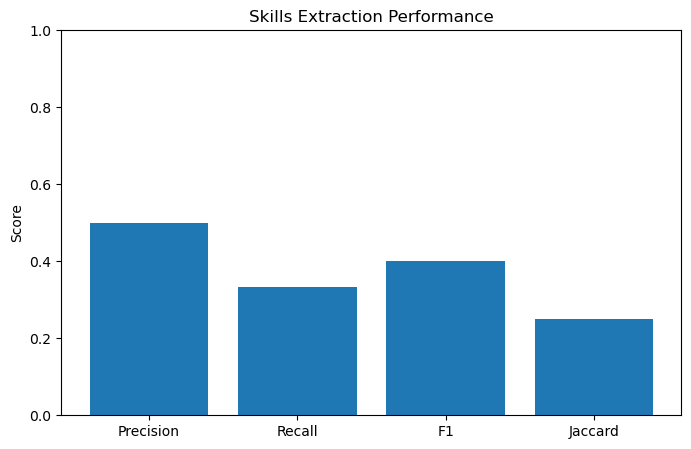

In [17]:
plt.figure(figsize=(8,5))
plt.bar(
    ["Precision", "Recall", "F1", "Jaccard"],
    [results["Skill Precision"], results["Skill Recall"], results["Skill F1"], results["Skill Jaccard"]]
)
plt.title("Skills Extraction Performance")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()


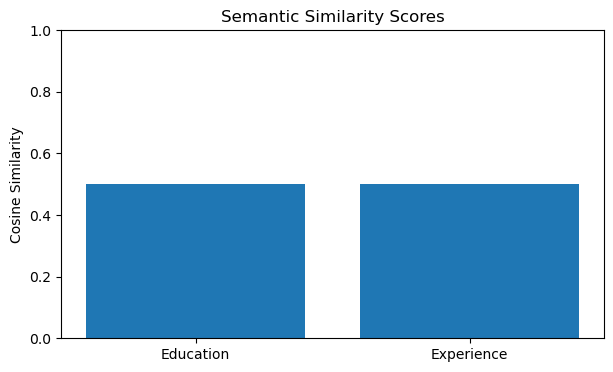

In [18]:
plt.figure(figsize=(7,4))
bars = ["Education", "Experience"]
scores = [results["Education Similarity"], results["Experience Similarity"]]

plt.bar(bars, scores)
plt.ylim(0, 1)
plt.title("Semantic Similarity Scores")
plt.ylabel("Cosine Similarity")
plt.show()


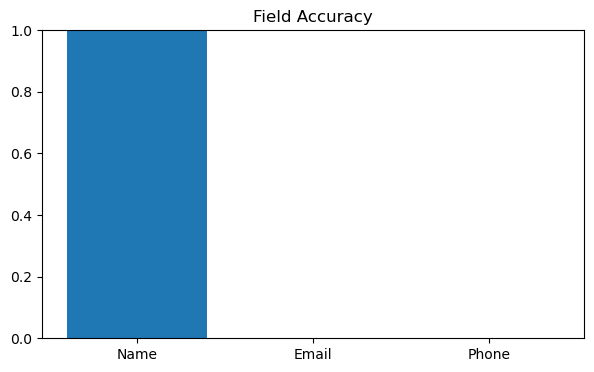

In [19]:
plt.figure(figsize=(7,4))
plt.bar(["Name", "Email", "Phone"], [results["Name Accuracy"], results["Email Accuracy"], results["Phone Accuracy"]])
plt.title("Field Accuracy")
plt.ylim(0, 1)
plt.show()


In [21]:
print(" FINAL EVALUATION REPORT \n")
for k, v in results.items():
    print(f"{k}: {v:.3f}")



 FINAL EVALUATION REPORT 

Name Accuracy: 1.000
Email Accuracy: 0.000
Phone Accuracy: 0.000
Skill Precision: 0.500
Skill Recall: 0.333
Skill F1: 0.400
Skill Jaccard: 0.250
Skill Hamming Loss: 0.750
Education Similarity: 0.500
Experience Similarity: 0.500
Field Accuracy: 0.333
Resume Accuracy: 0.000
